<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Self_Project_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Optimization

In [ ]:
# Matrix computations
#from numpy import *
import numpy as np

# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


In [9]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
# y = arange(-5, 5, 0.25)
# y = arange(-5, 5, 0.25)

def plotf(x,y):
  X, Y = meshgrid(x, y)


  # z = x^2 + y^2
  Z = f(X,Y)

  # Plot (X,Y) in 3D
  fig = figure(1)
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  fig.colorbar(surf, shrink = 0.7, aspect=5)
  show()    

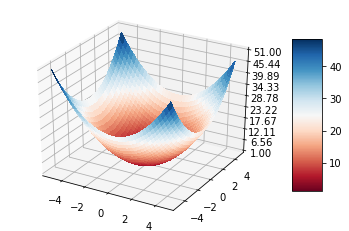

In [ ]:
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
plotf(x,y)

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

In [10]:
def fun_derivative_xy(x,y):
  return np.array((2*x,2*y))

In [11]:
# Your code here

def grad_descent(x_prev,y_prev,learning_rate):

  epsilon = 0.001
  
  prev_variable = np.array((x_prev,y_prev))                                                        #creating array

  next_variable = prev_variable - learning_rate * fun_derivative_xy(prev_variable[0],prev_variable[1])

  x_sequence, y_sequence = np.array([]), np.array([])
  x_sequence, y_sequence = np.append(x_sequence, next_variable[0]), np.append(y_sequence, next_variable[1])

  grad_iter = 1
  while abs(np.sqrt(np.sum((next_variable - prev_variable)**2))) > epsilon:                       #euclidean distance

    prev_varibale = next_variable
    next_variable = prev_variable - learning_rate * fun_derivative_xy(prev_variable[0],prev_variable[1])

    x_sequence, y_sequence = np.append(x_sequence, next_variable[0]), np.append(y_sequence, next_variable[1])
    
    
    grad_iter +=1

  return next_variable, x_sequence, y_sequence, grad_iter  


In [21]:
grad_output = grad_descent(5,5,0.1)
plotf(X,grad_output[1])

KeyboardInterrupt: ignored

In [15]:
print(grad_output[0])
print(grad_output[1])
print(grad_output[2])
print(grad_output[3])

NameError: ignored

In [ ]:
plotf(grad_output[1],grad_output[2])